# Project Details
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content

Columns

1)age: age of primary beneficiary

2)sex: insurance contractor gender, female, male

3)bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4)children: Number of children covered by health insurance / Number of dependents

5)smoker: Smoking

6)region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7)charges: Individual medical costs billed by health insurance

Acknowledgements
The dataset is available on GitHub here.

Inspiration
Can you accurately predict insurance costs?

In [1]:
#We will try to analyse and visualuze the dataset and try to predict the insurance costs of different individuals
#using regression models and try to understand different variable selection techniques like 
#backward elimination and forward selection

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
%matplotlib inline

# Getting Dataset

In [3]:
data_file=r'insurance.csv'

In [4]:
dataset=pd.read_csv(data_file)

# Getting insights from Dataset

In [5]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Visualization

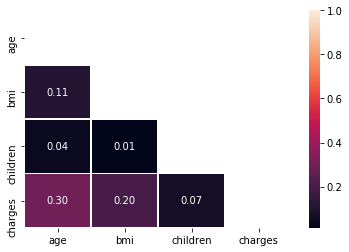

In [12]:
correlation_plot=dataset.corr()
mask = np.triu(np.ones_like(correlation_plot, dtype=np.bool))
sns.heatmap(correlation_plot,mask=mask,annot=True,fmt='0.2f',linewidth=0.8)

In [13]:
correlation_plot['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

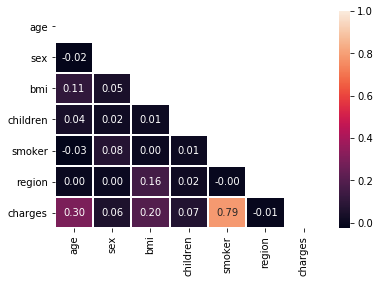

In [44]:
correlation_plot=dataset.corr()
mask = np.triu(np.ones_like(correlation_plot, dtype=np.bool))
sns.heatmap(correlation_plot,mask=mask,annot=True,fmt='0.2f',linewidth=0.8)

In [45]:
correlation_plot['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

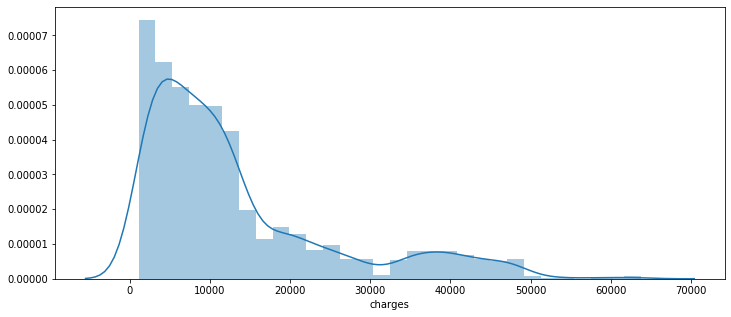

In [14]:
plt.figure(figsize=(12,5))
sns.distplot(dataset['charges'])

Text(0.5, 1.0, 'Smokers vs Non-Smokers')

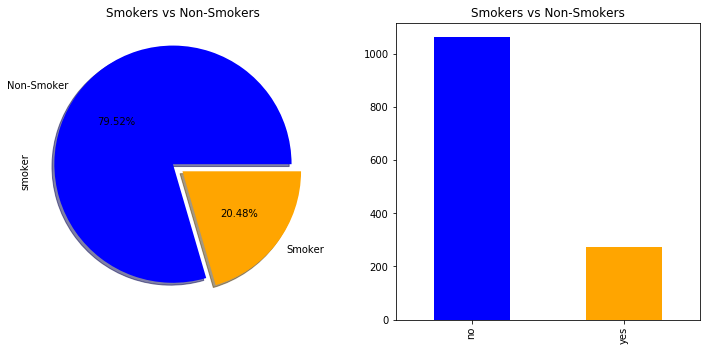

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
explode=(0.1,0)
color=['blue','orange']
label=['Non-Smoker','Smoker']
dataset['smoker'].value_counts().plot.pie(autopct='%.2f%%',shadow=True,explode=explode,colors=color,labels=label)
plt.title('Smokers vs Non-Smokers')
plt.subplot(2,2,2)
color=['blue','orange']
dataset['smoker'].value_counts().plot.bar(color=color)
plt.title('Smokers vs Non-Smokers')

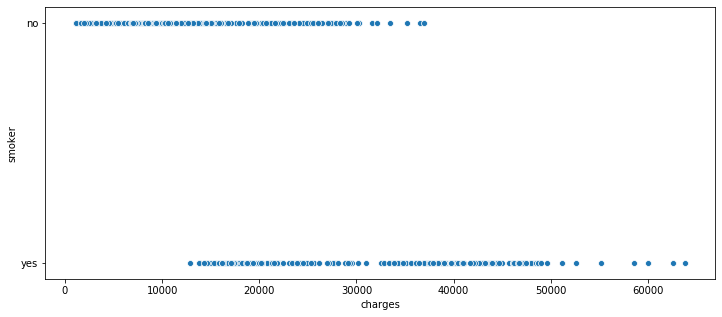

In [16]:
plt.figure(figsize=(12,5))

sns.scatterplot(dataset['charges'],dataset['smoker'])

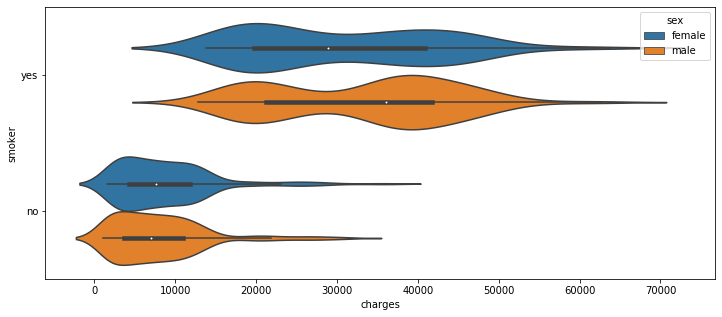

In [17]:
plt.figure(figsize=(12,5))

sns.violinplot(dataset['charges'],dataset['smoker'],hue=dataset['sex'])

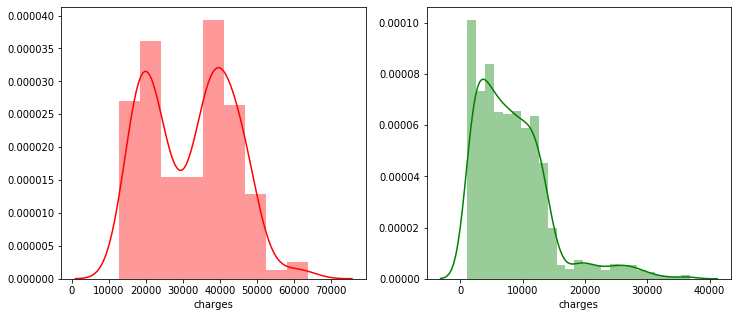

In [46]:
f=plt.figure(figsize=(12,5))
ax=f.add_subplot(121)
sns.distplot(dataset[(dataset.smoker==1)]['charges'],color='r',ax=ax)
ax=f.add_subplot(122)
sns.distplot(dataset[(dataset.smoker==0)]['charges'],color='g',ax=ax)

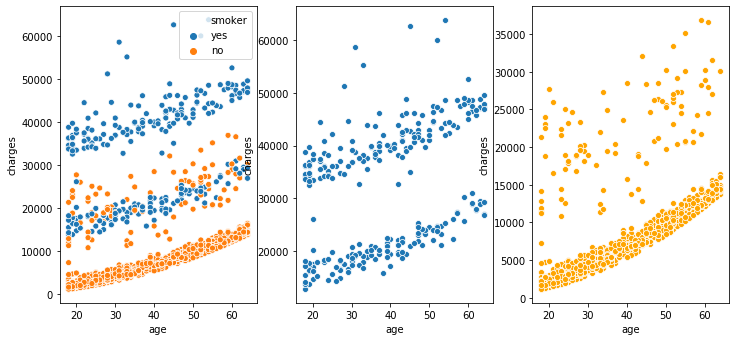

In [18]:
plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
sns.scatterplot(dataset['age'],dataset['charges'],hue=dataset['smoker'])
plt.subplot(2,3,2)
smoker_dataset=dataset[dataset['smoker']=='yes']
non_smoker_dataset=dataset[dataset['smoker']=='no']
sns.scatterplot(smoker_dataset['age'],smoker_dataset['charges'])
plt.subplot(2,3,3)
sns.scatterplot(non_smoker_dataset['age'],non_smoker_dataset['charges'],color='orange')

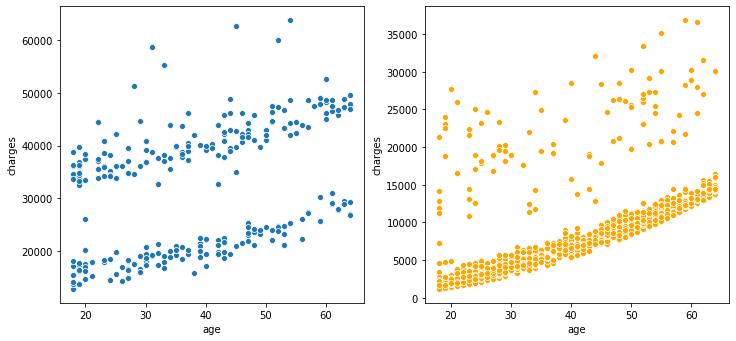

In [19]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
smoker_dataset=dataset[dataset['smoker']=='yes']
non_smoker_dataset=dataset[dataset['smoker']=='no']
sns.scatterplot(smoker_dataset['age'],smoker_dataset['charges'])
plt.subplot(2,2,2)
sns.scatterplot(non_smoker_dataset['age'],non_smoker_dataset['charges'],color='orange')

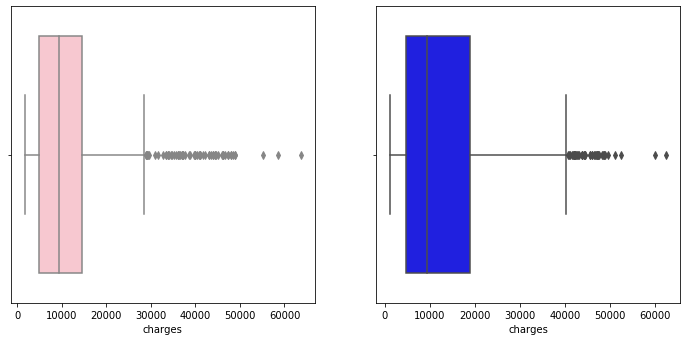

In [20]:
female_dataset=dataset[dataset['sex']=='female']
male_dataset=dataset[dataset['sex']=='male']
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(female_dataset['charges'],color='pink')
plt.subplot(2,2,2)
sns.boxplot(male_dataset['charges'],color='blue')

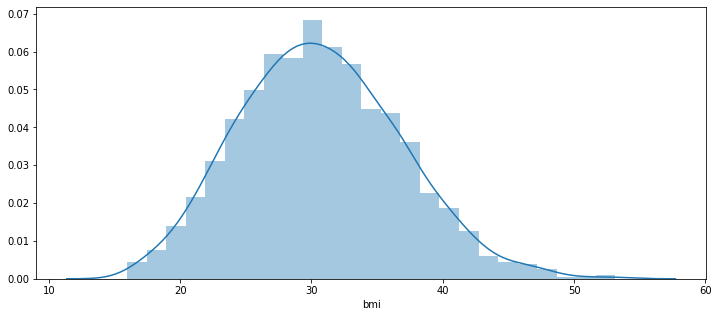

In [21]:
plt.figure(figsize=(12,5))

sns.distplot(dataset['bmi'])

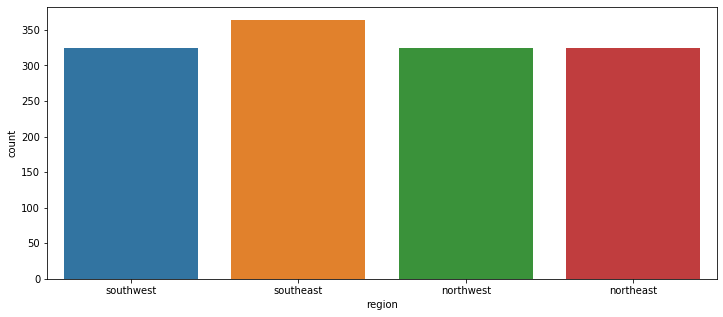

In [22]:
plt.figure(figsize=(12,5))

sns.countplot(dataset['region'])

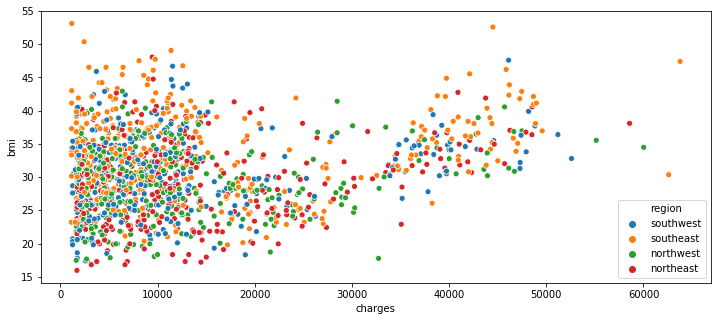

In [23]:
plt.figure(figsize=(12,5))

sns.scatterplot(dataset['charges'],dataset['bmi'],hue=dataset['region'])

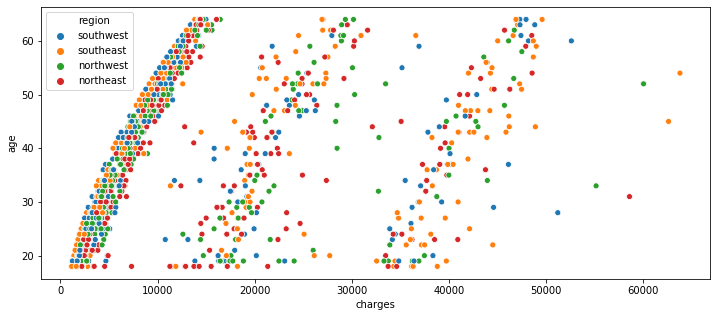

In [24]:
plt.figure(figsize=(12,5))

sns.scatterplot(dataset['charges'],dataset['age'],hue=dataset['region'])

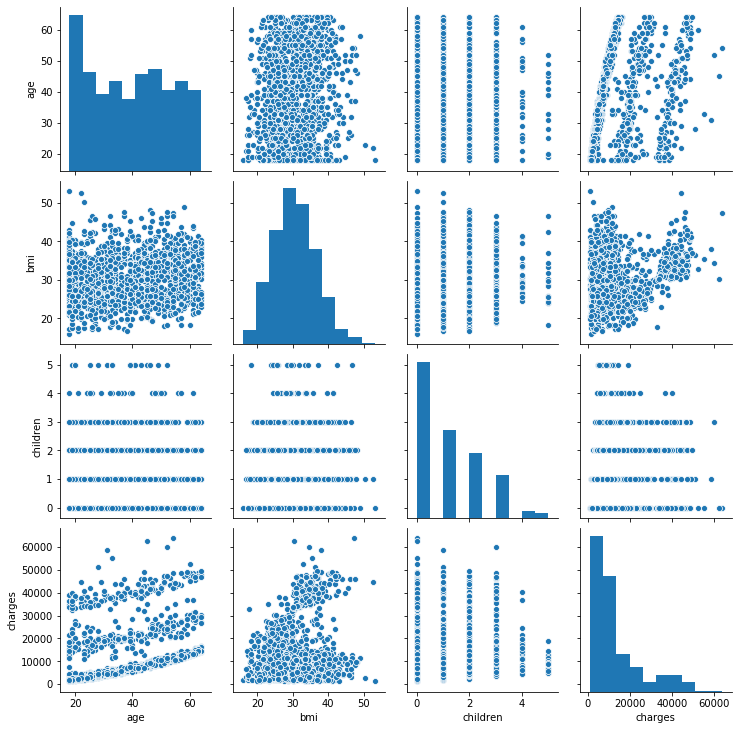

In [25]:
sns.pairplot(dataset)

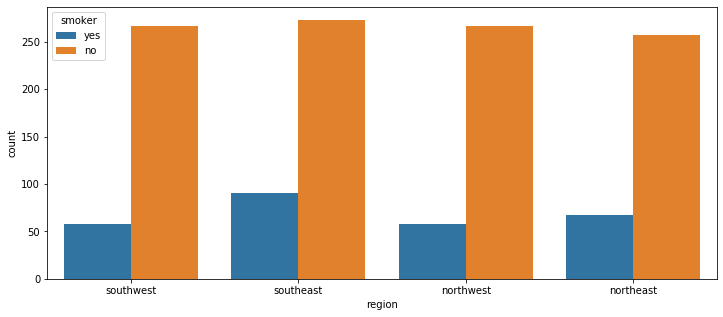

In [26]:
#Region wise Smoker
plt.figure(figsize=(12,5))

sns.countplot(dataset['region'],hue=dataset['smoker'])

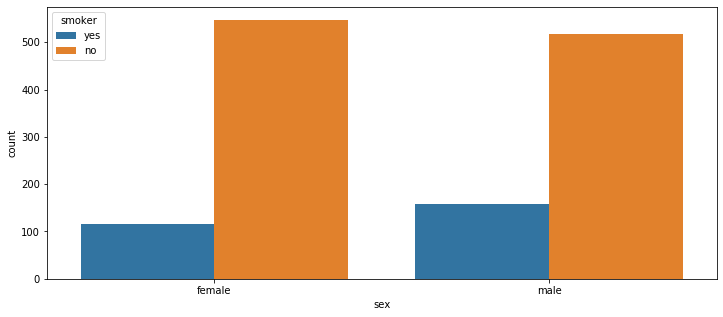

In [27]:
#Sex wise Smoker
plt.figure(figsize=(12,5))

sns.countplot(dataset['sex'],hue=dataset['smoker'])

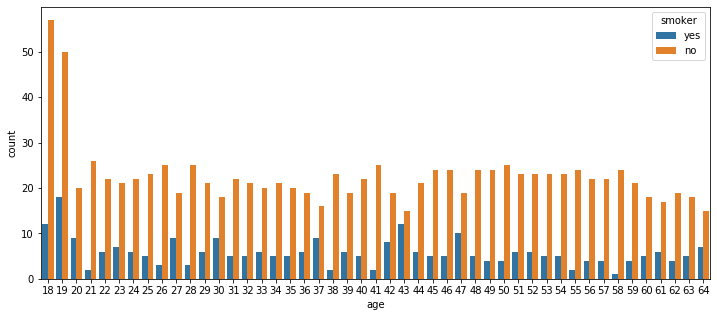

In [28]:
#Age wise Smoker
plt.figure(figsize=(12,5))
sns.countplot(dataset['age'],hue=dataset['smoker'])

<Figure size 864x360 with 0 Axes>

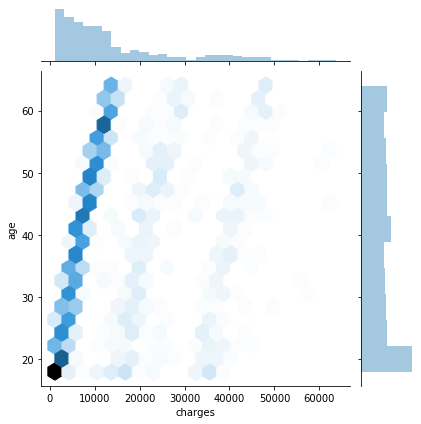

In [29]:
#Age, Charge, Smoker
plt.figure(figsize=(12,5))

sns.jointplot(data=dataset,x='charges',y='age',kind='hex')

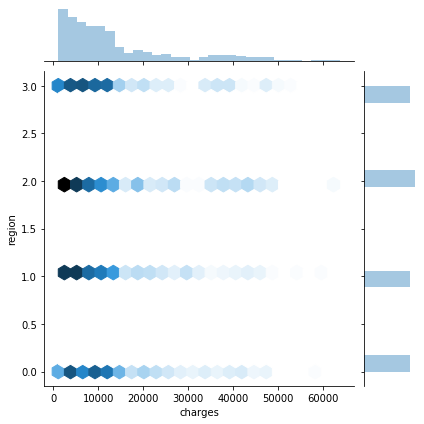

In [47]:
#Region, Charge, Smoker
sns.jointplot(data=dataset,x='charges',y='region',kind='hex')

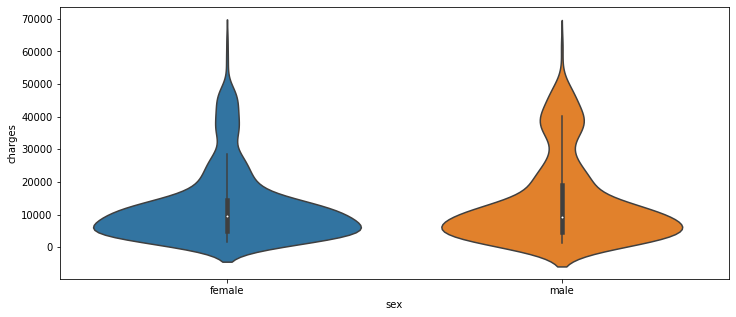

In [30]:
#Sex, Charge
plt.figure(figsize=(12,5))

sns.violinplot(dataset['sex'],dataset['charges'])

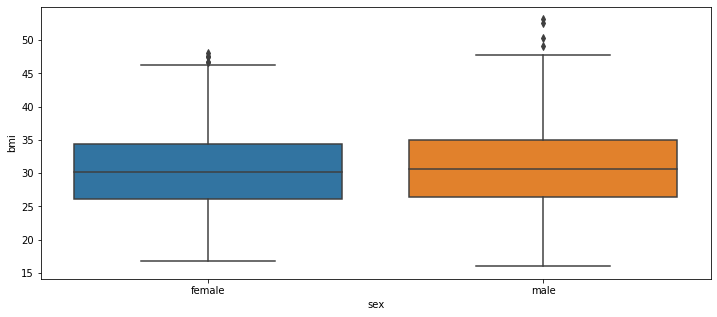

In [31]:
#Sex, BMI
plt.figure(figsize=(12,5))

sns.boxplot(dataset['sex'],dataset['bmi'])


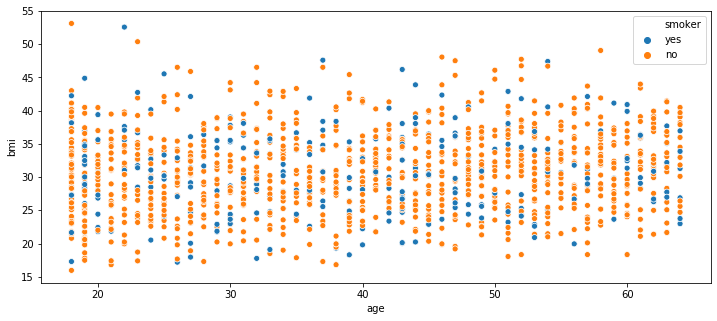

In [32]:
#Age, BMI
plt.figure(figsize=(12,5))

sns.scatterplot(dataset['age'],dataset['bmi'],hue=dataset['smoker'])


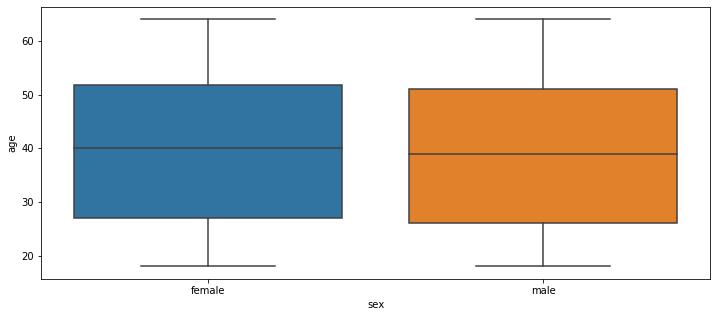

In [33]:
#Age, Sex
plt.figure(figsize=(12,5))

sns.boxplot(dataset['sex'],dataset['age'])

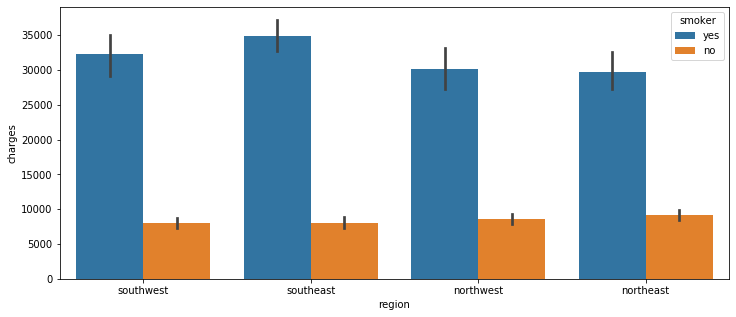

In [34]:
plt.figure(figsize=(12,5))

sns.barplot(dataset['region'],dataset['charges'],hue=dataset['smoker'])

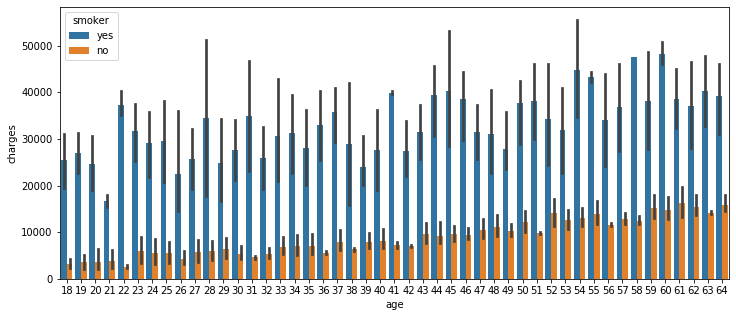

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(dataset['age'],dataset['charges'],hue=dataset['smoker'])

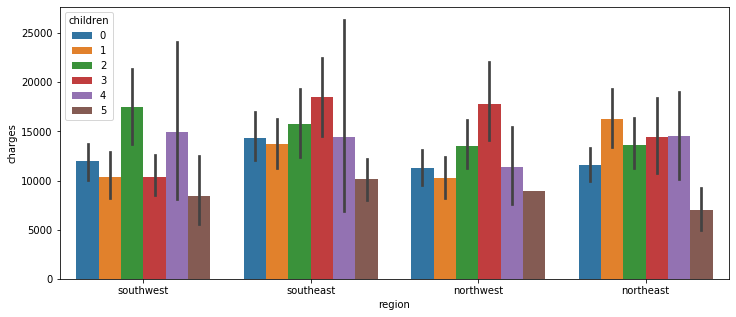

In [36]:
plt.figure(figsize=(12,5))

sns.barplot(dataset['region'],dataset['charges'],hue=dataset['children'])

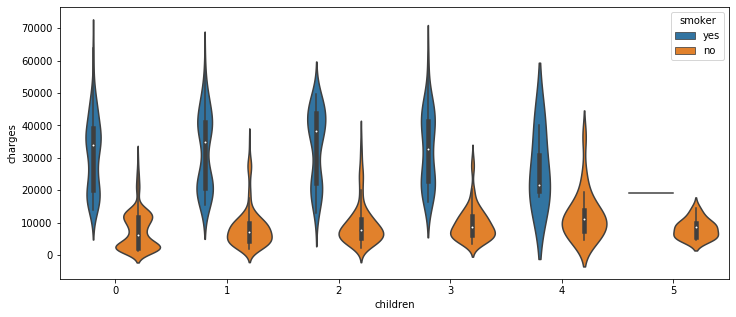

In [37]:
plt.figure(figsize=(12,5))

sns.violinplot(dataset['children'],dataset['charges'],hue=dataset['smoker'])

<Figure size 864x360 with 0 Axes>

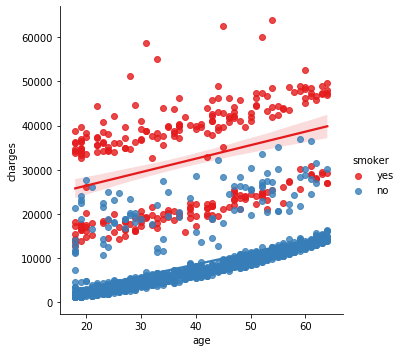

In [38]:
plt.figure(figsize=(12,5))

sns.lmplot(x = 'age', y = 'charges', data=dataset, hue='smoker', palette='Set1')

<Figure size 864x360 with 0 Axes>

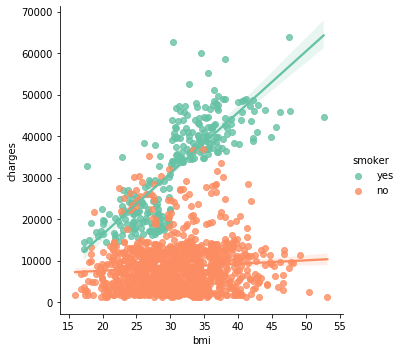

In [39]:
plt.figure(figsize=(12,5))

sns.lmplot(x = 'bmi', y = 'charges', data=dataset, hue='smoker', palette='Set2')

<Figure size 864x360 with 0 Axes>

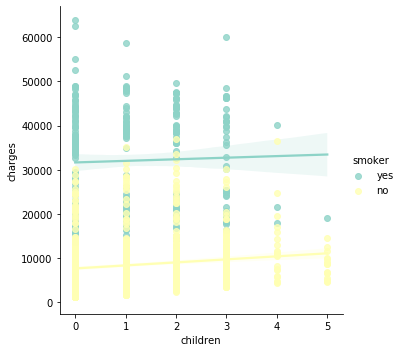

In [40]:
plt.figure(figsize=(12,5))

sns.lmplot(x = 'children', y = 'charges', data=dataset, hue='smoker', palette='Set3')

# Analysis

# Preparing

In [41]:
#Label Encoding-Converting categorical data to numerical data
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(dataset.sex)
dataset.sex=le.transform(dataset.sex)
le.fit(dataset.smoker)
dataset.smoker=le.transform(dataset.smoker)
le.fit(dataset.region)
dataset.region=le.transform(dataset.region)

In [43]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Modelling

In [48]:
#whole model(all 6 independent variables) used to predict the independent variable

In [49]:
#backward elimination

In [50]:
#forward selection

In [51]:
#splitting data into training and testing dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,6].values
from sklearn.model_selection import train_test_split


In [52]:
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [53]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [55]:
X_train.shape

(1070, 6)

In [56]:
X_test.shape

(268, 6)

In [57]:
y_train.shape

(1070,)

In [58]:
y_test.shape

(268,)

In [59]:
#whole model:
from sklearn.linear_model import LinearRegression
lm1=LinearRegression()
lm1.fit(X_train,y_train)
lm1.predict(X_test)
print(lm1.coef_,lm1.intercept_)
lm1.score(X_test,y_test)

[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254] -11661.983908824392


0.7998747145449959

Results...

Linear Regression : 5643.219748880902 0.7998747145449959
Decision Tree Regression : 7587.044613435255 0.6382626808537033
Random Forest Regression : 4517.5632021147185 0.8717502537718921


[]

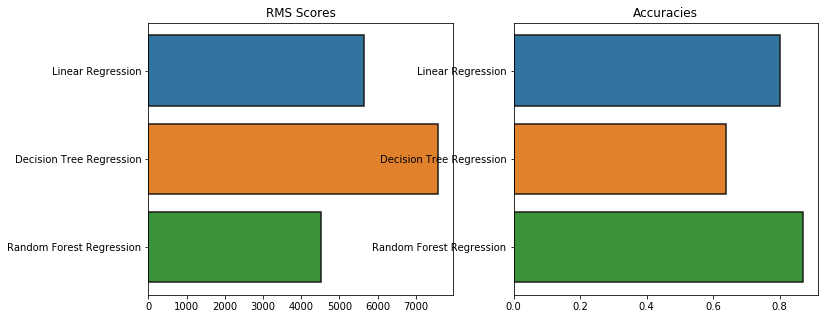

In [60]:
#Whole Model- Different Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score,mean_squared_error

regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ]
reg_pred=[]
accuracies=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    accuracy= model.score(X_test,y_test)
    accuracies.append(accuracy)
    print(name,rms,accuracy) 

y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression' ]
x_ax=reg_pred

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")
plt.title('RMS Scores')
plt.plot()
plt.subplot(1,2,2)
sns.barplot(x=accuracies,y=y_ax,linewidth=1.5,edgecolor="0.1")
plt.title('Accuracies')
plt.plot()

In [61]:
#----------------------------------------------------------------------------------#

In [62]:
#Backward Elimination
import statsmodels.api as sm 
X_be1=X[:,[0,1,2,3,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_be1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1537.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:33:24   Log-Likelihood:                         -13621.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1332   BIC:                                  2.729e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           199.5462     11.538     17.295      0.000     176.912     222.180
x2          -693.5223    347.997     -1.993      0.046   -1376.205     -10.840
x3            62.3100     18.013      3.459      0.001      26.973      97.647
x4           265.5263    144.137      1.842      0.066     -17.234     548.286
x5           2.34e+04    433.195     54.006      0.000    2.25e+04    2.42e+04
x6          -553.9940    159.449     -3.474      0.001    -866.792    -241.196
==============================================================================
Omnibus:                      272.456   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.386
Skew:                           1.120   Prob(JB):                    1.58e-136
Kurtosis:                       5.491   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_be2=X[:,[0,1,2,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_be2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1840.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:33:30   Log-Likelihood:                         -13623.
No. Observations:                1338   AIC:                                  2.726e+04
Df Residuals:                    1333   BIC:                                  2.728e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           201.6778     11.490     17.553      0.000     179.137     224.218
x2          -671.1566    348.098     -1.928      0.054   -1354.036      11.722
x3            67.9452     17.767      3.824      0.000      33.091     102.800
x4          2.341e+04    433.512     54.000      0.000    2.26e+04    2.43e+04
x5          -545.3991    159.523     -3.419      0.001    -858.344    -232.455
==============================================================================
Omnibus:                      271.652   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.351
Skew:                           1.120   Prob(JB):                    5.33e-135
Kurtosis:                       5.465   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
X_be3=X[:,[0,1,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_be3).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              2273.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:33:32   Log-Likelihood:                         -13630.
No. Observations:                1338   AIC:                                  2.727e+04
Df Residuals:                    1334   BIC:                                  2.729e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           235.7394      7.296     32.313      0.000     221.427     250.051
x2          -317.3367    337.286     -0.941      0.347    -979.006     344.332
x3           2.36e+04    432.714     54.549      0.000    2.28e+04    2.45e+04
x4          -297.2862    146.476     -2.030      0.043    -584.635      -9.937
==============================================================================
Omnibus:                      264.736   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.743
Skew:                           1.084   Prob(JB):                    1.19e-134
Kurtosis:                       5.523   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_be4=X[:,[0,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_be4).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              3031.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:33:32   Log-Likelihood:                         -13630.
No. Observations:                1338   AIC:                                  2.727e+04
Df Residuals:                    1335   BIC:                                  2.728e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           233.0209      6.699     34.786      0.000     219.880     246.162
x2          2.355e+04    429.299     54.864      0.000    2.27e+04    2.44e+04
x3          -316.1703    145.088     -2.179      0.029    -600.796     -31.544
==============================================================================
Omnibus:                      266.314   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.932
Skew:                           1.089   Prob(JB):                    1.47e-135
Kurtosis:                       5.528   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Best Features are Age, Smoker, Regions

In [67]:
X=dataset.iloc[:,[0,4,5]].values
y=dataset.iloc[:,6].values

In [68]:
X

array([[19,  1,  3],
       [18,  0,  2],
       [28,  0,  2],
       ...,
       [18,  0,  2],
       [21,  0,  3],
       [61,  1,  1]], dtype=int64)

In [69]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [71]:
X_train.shape

(1070, 3)

In [72]:
X_test.shape

(268, 3)

In [73]:
y_train.shape

(1070,)

In [74]:
y_test.shape

(268,)

Results...

Linear Regression : 6016.213695593682 0.7725454923581263
Decision Tree Regression : 7543.001912826166 0.6424502524438279
Random Forest Regression : 6971.824533229763 0.6945494323454251


[]

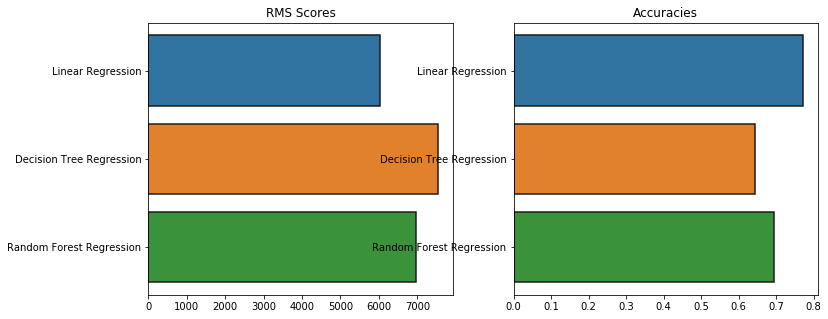

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score,mean_squared_error

regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ]
reg_pred=[]
accuracies=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    accuracy= model.score(X_test,y_test)
    accuracies.append(accuracy)
    print(name,rms,accuracy) 

y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression' ]
x_ax=reg_pred

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")
plt.title('RMS Scores')
plt.plot()
plt.subplot(1,2,2)
sns.barplot(x=accuracies,y=y_ax,linewidth=1.5,edgecolor="0.1")
plt.title('Accuracies')
plt.plot()

In [76]:
#-----------------------------------------------------------------------#

In [77]:
#Forward Selection

In [78]:
X_fs1=dataset.iloc[:,0].values
y=dataset.iloc[:,-1].values

In [79]:
X_fs1

array([19, 18, 28, ..., 18, 21, 61], dtype=int64)

In [80]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [81]:
X_fs1=dataset.iloc[:,0].values
regressor_OLS=sm.OLS(endog=y,exog=X_fs1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.583
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              1868.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                   3.95e-256
Time:                        14:33:45   Log-Likelihood:                         -14421.
No. Observations:                1338   AIC:                                  2.884e+04
Df Residuals:                    1337   BIC:                                  2.885e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           329.2873      7.618     43.224      0.000     314.343     344.232
==============================================================================
Omnibus:                      393.480   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.455
Skew:                           1.714   Prob(JB):                    3.14e-183
Kurtosis:                       4.823   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X_fs2=dataset.iloc[:,[0,1]].values
regressor_OLS=sm.OLS(endog=y,exog=X_fs2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              947.6
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                   6.01e-257
Time:                        14:33:45   Log-Likelihood:                         -14415.
No. Observations:                1338   AIC:                                  2.883e+04
Df Residuals:                    1336   BIC:                                  2.884e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           306.1242     10.150     30.160      0.000     286.213     326.036
x2          2043.2674    594.697      3.436      0.001     876.626    3209.908
==============================================================================
Omnibus:                      387.299   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              819.051
Skew:                           1.691   Prob(JB):                    1.40e-178
Kurtosis:                       4.803   Cond. No.                         78.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
X_fs3=dataset.iloc[:,[0,1,2]].values
regressor_OLS=sm.OLS(endog=y,exog=X_fs3).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                   6.55e-262
Time:                        14:33:46   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           207.6709     20.510     10.125      0.000     167.436     247.906
x2           979.3428    619.212      1.582      0.114    -235.392    2194.078
x3           158.2079     28.739      5.505      0.000     101.830     214.586
==============================================================================
Omnibus:                      364.363   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.846
Skew:                           1.631   Prob(JB):                    1.21e-159
Kurtosis:                       4.578   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X_fs4=dataset.iloc[:,[0,2]].values
regressor_OLS=sm.OLS(endog=y,exog=X_fs4).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              981.2
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                   6.45e-263
Time:                        14:33:46   Log-Likelihood:                         -14401.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1336   BIC:                                  2.882e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           208.8632     20.507     10.185      0.000     168.633     249.094
x2           172.3943     27.318      6.311      0.000     118.803     225.986
==============================================================================
Omnibus:                      364.702   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              732.185
Skew:                           1.634   Prob(JB):                    1.02e-159
Kurtosis:                       4.567   Cond. No.                         5.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
X_fs5=dataset.iloc[:,[0,2,3]].values
regressor_OLS=sm.OLS(endog=y,exog=X_fs5).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                   6.52e-262
Time:                        14:33:47   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           205.5096     20.605      9.974      0.000     165.088     245.931
x2           162.5084     28.007      5.802      0.000     107.566     217.451
x3           407.6827    257.331      1.584      0.113     -97.135     912.501
==============================================================================
Omnibus:                      369.789   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.403
Skew:                           1.648   Prob(JB):                    1.13e-163
Kurtosis:                       4.610   Cond. No.                         42.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X_fs6=dataset.iloc[:,[0,2]].values
regressor_OLS=sm.OLS(endog=y,exog=X_fs6).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              981.2
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                   6.45e-263
Time:                        14:33:47   Log-Likelihood:                         -14401.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1336   BIC:                                  2.882e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           208.8632     20.507     10.185      0.000     168.633     249.094
x2           172.3943     27.318      6.311      0.000     118.803     225.986
==============================================================================
Omnibus:                      364.702   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              732.185
Skew:                           1.634   Prob(JB):                    1.02e-159
Kurtosis:                       4.567   Cond. No.                         5.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
X_fs7=dataset.iloc[:,[0,2,4]].values
regressor_OLS=sm.OLS(endog=y,exog=X_fs7).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              3031.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:33:47   Log-Likelihood:                         -13631.
No. Observations:                1338   AIC:                                  2.727e+04
Df Residuals:                    1335   BIC:                                  2.728e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           199.6458     11.535     17.307      0.000     177.017     222.275
x2            33.7512     15.580      2.166      0.030       3.188      64.315
x3          2.332e+04    433.987     53.745      0.000    2.25e+04    2.42e+04
==============================================================================
Omnibus:                      277.578   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.617
Skew:                           1.141   Prob(JB):                    9.49e-139
Kurtosis:                       5.489   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
X_fs8=dataset.iloc[:,[0,2,4,5]].values
regressor_OLS=sm.OLS(endog=y,exog=X_fs8).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              2294.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:33:48   Log-Likelihood:                         -13625.
No. Observations:                1338   AIC:                                  2.726e+04
Df Residuals:                    1334   BIC:                                  2.728e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           200.8988     11.495     17.478      0.000     178.349     223.448
x2            58.8403     17.145      3.432      0.001      25.205      92.475
x3          2.334e+04    432.249     53.987      0.000    2.25e+04    2.42e+04
x4          -549.2686    159.673     -3.440      0.001    -862.507    -236.031
==============================================================================
Omnibus:                      273.748   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.116
Skew:                           1.126   Prob(JB):                    1.10e-136
Kurtosis:                       5.482   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X=dataset.iloc[:,[0,2,4,5]].values
y=dataset.iloc[:,6].values

In [90]:
X

array([[19.  , 27.9 ,  1.  ,  3.  ],
       [18.  , 33.77,  0.  ,  2.  ],
       [28.  , 33.  ,  0.  ,  2.  ],
       ...,
       [18.  , 36.85,  0.  ,  2.  ],
       [21.  , 25.8 ,  0.  ,  3.  ],
       [61.  , 29.07,  1.  ,  1.  ]])

In [91]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

Results...

Linear Regression : 5688.626766322956 0.7966412232221931
Decision Tree Regression : 7410.996011926145 0.6548553076534683
Random Forest Regression : 4882.032839653195 0.8502215151713243


[]

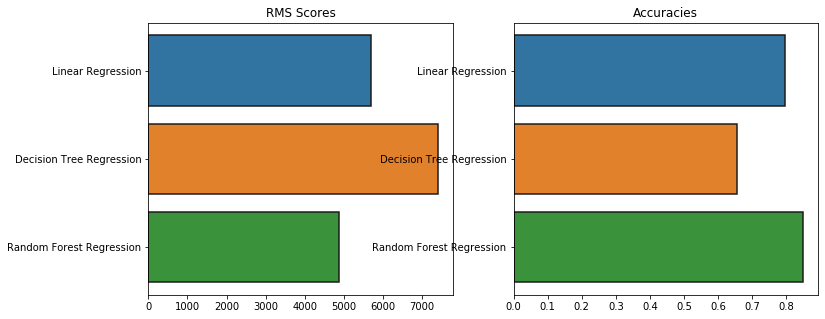

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score,mean_squared_error

regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ]
reg_pred=[]
accuracies=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    accuracy= model.score(X_test,y_test)
    accuracies.append(accuracy)
    print(name,rms,accuracy) 

y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression' ]
x_ax=reg_pred

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")
plt.title('RMS Scores')
plt.plot()
plt.subplot(1,2,2)
sns.barplot(x=accuracies,y=y_ax,linewidth=1.5,edgecolor="0.1")
plt.title('Accuracies')
plt.plot()

In [94]:
#So we see AIC Value 
#FS=27120.7 (4 variables) Accuracy Best- Random Forest Model 0.8502
#BE=27255.2 (3 variables) Accuracy Best- Linear Regression Model 0.7725
#FM=27112.45 (6 variables) Accuracy Best- Random Forest Model 0.8717